In [31]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import cuda
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

FashionMNIST

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [55]:
cuda.is_available()

True

In [58]:
if cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

In [45]:
train = datasets.FashionMNIST('./',
                             train = True,
                             download = True,
                             transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
test = datasets.FashionMNIST('./',
                             train = False,
                             download = True,
                             transform = transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = False)

In [72]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # runs init of nn.module

        
        input_sizes = [28*28, 64, 64, 64]
        output_sizes = [64, 64, 64, 10]

        # 3 layers of 64 neurons
        self.fc1 = nn.Linear(input_sizes[0], output_sizes[0])
        self.fc2 = nn.Linear(input_sizes[1], output_sizes[1])
        self.fc3 = nn.Linear(input_sizes[2], output_sizes[2])
        self.fc4 = nn.Linear(input_sizes[3], output_sizes[3])

    def forward(self, x):
#         out = nn.Sequential(
#             self.fc1(x),
#             nn.ReLU(),
#             self.fc2(x),
#             nn.ReLU(),
#             self.fc3(x),
#             nn.ReLU(),
#             self.fc4(x),
#             nn.Softmax()
#         )
        x = F.relu(self.fc1(x)) # run ReLU over entire layer
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)         # since we want output to be a probability distribution (multiclass),
                                # we use log softmax
        x = F.log_softmax(x, dim = 1)

        return x

In [73]:
net = Net()
net = net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [74]:
optimizer = optim.Adam(net.parameters(), lr = 1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        net.zero_grad()                   # every time data is passed through network, zero the gradient
        X, y = data
        X = X.to(device)
        y = y.to(device)
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()                  # backpropagate loss
        optimizer.step()                 # adjust the weights
        
    print(loss)

tensor(0.5534, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3465, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0536, device='cuda:0', grad_fn=<NllLossBackward>)


In [97]:
correct = 0
total = 0

with torch.no_grad():
    # net.train()
    # net.eval() 
    for data in trainset:
        X, y = data
        X = X.to(device)
        y = y.to(device)
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct / total, 3))

Accuracy: 0.882


In [98]:
total

60000

In [99]:
X = X.to('cpu')
y = y.to('cpu')

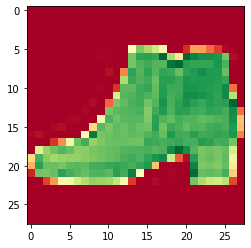

In [100]:
plt.imshow(X[3][0].squeeze(), cmap = 'RdYlGn')
plt.show()

In [101]:
y[3]

tensor(9)